In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import MisrToolkit as mtk # needs python3.6
# from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os
import glob

# Extract data from MISR-estimated roughness files by using MTK library. Should use python3.6 for this purpose 

In [26]:
# atm_day_time = "2016-04-29T11:30:28Z"
atm_day_time = "2016-04-22T02:09:20Z"
orbit_path = mtk.time_to_orbit_path(atm_day_time)
orbit_path

(86934, 111)

In [27]:
mtk.latlon_to_bls(111, 275, 71.753154, 203.918)

Exception: MtkLatLonToBls Failed

## Plot Transect 

In [2]:
atm_file = "insample_atm_withPathOrbit_3cams_forTransect.csv"
atm_dir = "/media/ehsan/6T_part1/2016/april_2016/14528_apr2016/project_april_2016_3cam/training_data"
atm_data_fp = os.path.join(atm_dir, atm_file)

In [3]:
transect_small = pd.read_csv(atm_data_fp)
transect_small

Unnamed: 0  path  orbit  block    line   sample        lat         lon  \
0              1   152  86922      9   75.15  1205.60  74.422639  215.545163   
1              2   152  86922      9   74.95  1205.52  74.422351  215.546735   
2              3   152  86922      9   74.76  1205.45  74.422064  215.548307   
3              4   152  86922      9   74.92  1205.51  74.422294  215.547049   
4              5   152  86922      9   75.10  1205.71  74.422393  215.544545   
...          ...   ...    ...    ...     ...      ...        ...         ...   
9995        9996    79  86932     29  417.91  1364.11  74.244492  215.095957   
9996        9997    79  86932     29  417.90  1364.32  74.244203  215.097542   
9997        9998    79  86932     29  417.91  1364.13  74.244466  215.096102   
9998        9999    79  86932     29  418.03  1363.90  74.244545  215.093780   
9999       10000    79  86932     29  418.03  1364.11  74.244252  215.095348   

         Ca_r     Cf_r     An_r   rms  
0     0.84397  1.39007  0.59725  5.19  
1     0.83645  1.39609  0.58973  5.72  
2     0.83645  1.39609  0.58973  6.33  
3     0.83645  1.39609  0.58973  5.97  
4     0.84397  1.39007  0.59725  5.18  
...       ...      ...      ...   ...  
9995  0.85789  0.96812  0.80035  6.02  
9996  0.85789  0.96812  0.80035  7.34  
9997  0.85789  0.96812  0.80035  6.13  
9998  0.85494  0.96673  0.80104  7.45  
9999  0.85754  0.95754  0.79689  5.67  

[10000 rows x 12 columns]

In [4]:
transect_small = transect_small.iloc[0:5000]
transect_small.iloc[0]

Unnamed: 0        1.000000
path            152.000000
orbit         86922.000000
block             9.000000
line             75.150000
sample         1205.600000
lat              74.422639
lon             215.545163
Ca_r              0.843970
Cf_r              1.390070
An_r              0.597250
rms               5.190000
Name: 0, dtype: float64

In [5]:
roughness_dir = "/media/ehsan/6T_part1/2016/april_2016/14528_apr2016/project_april_2016_3cam/roughness_predicted_from_PH"


In [6]:
# # extract MISR-estimated roughness for the same latLon locations and plot them together with ATM
# transect_from_misr = []
# for irow in range(transect_small.shape[0]): # each row==LatLon might fall in several blocks==POB, we open each block and will average all at the end
    
#     print("DF row: %s" %irow)
#     lat_lon = transect_small[['lat','lon']].iloc[irow]
#     print(lat_lon)
    
#     path_list = mtk.latlon_to_path_list(lat_lon[0], lat_lon[1])
#     print(path_list)
    
#     roughness_per_pixel_list = []
#     for path in path_list:
#         # Q- now that we have found many paths, how figure out to select which path?
#         bls = mtk.latlon_to_bls(path, 275 , lat_lon[0], lat_lon[1])
#         print(bls)
        
#         # use P and B to find roughness file, open it, and extract value for LS, append it to a list, and maybe finally append the list to DF as the last column
#         if path < 100:
#             print(path)
#             path_str = str(path).zfill(3)
#             print(path_str)
            
#         roughness_filepattern = "roughness_toa_refl_P"+path_str+"_*"+"_B0"+str(bls[0])+".dat"
#         print(roughness_filepattern)
#         rough_file_fp = os.path.join(roughness_dir, roughness_filepattern)
#         print(rough_file_fp)
        
#         # check if file is found on machine
#         roughness_file_found_list = glob.glob(os.path.join(roughness_dir, roughness_filepattern))
#         print("roughness file found: %d" %len(roughness_file_found_list))
        
#         if (len(roughness_file_found_list) > 1):
#             raise ValueError('more than 1 file found, there is a problem with this code and it has to be reviewed.')
        
#         if (len(roughness_file_found_list) <= 0):
#             print("roughness file not found- continue to next path")
#             continue
            
#         # open roughness file and read pixel value- chat binary format to 2D array and read pixel value
#         rough_2d_arr = np.fromfile(roughness_file_found_list[0], dtype=np.double)[0:1048576].reshape((512,-1))
#         print(rough_2d_arr.shape)
        
#         pixel_row = bls[1]
#         pixel_col = bls[2]
#         roughness_value = rough_2d_arr[int(pixel_row), int(pixel_col)]
#         if roughness_value > 0:
#             roughness_per_pixel_list.append(roughness_value)
    
#     print("========================== extracted rough pixels ===========================")
#     print(roughness_per_pixel_list)
#     mean_roughness_per_pixel = sum(roughness_per_pixel_list)/len(roughness_per_pixel_list)
#     roughness_per_pixel_list.clear()
#     print(roughness_per_pixel_list)
#     print(mean_roughness_per_pixel)
#     print("\n")
#     transect_from_misr.append(mean_roughness_per_pixel)


In [7]:
# extract MISR-estimated roughness for the same latLon locations and plot them together with ATM
transect_from_misr_list = []

for irow in range(transect_small.shape[0]): # each row==LatLon might fall in several blocks==POB, we open each block and will average all at the end
    
    print("DF row: %s" %irow)
    poll_bls = transect_small[['path','orbit','lat','lon','block','line','sample']].iloc[irow]
    
    path_int = int(poll_bls[0])
    orbit_int = int(poll_bls[1])
    lat = poll_bls[2]
    lon = poll_bls[3]
    
    block_int = int(poll_bls[4])
    line_int = int(poll_bls[5])
    sample_int = int(poll_bls[6])
    
#     print(block_int)
#     print(line_int)
#     print(sample_int)
    
#     print("path: %s" %path_int)
#     print("orbit: %s" %orbit_int)
#     print("lat: %s" %lat)
#     print("lon: %s" %lon)
    
    
    # Q- now that we have found many paths, how figure out to select which path?
#     bls = mtk.latlon_to_bls(path_int, 275 , lat, lon)
#     print("MTK block-line-sample: (%s, %s, %s)" %bls)
    
    # check block digits
    if block_int < 10:
        block_str = str(block_int).zfill(2)


    # use P and B to find roughness file, open it, and extract value for LS, append it to a list, and maybe finally append the list to DF as the last column
    if path_int < 100:
        print(path_int)
        path_str = str(path_int).zfill(3)
        print(path_str)
    else:
        path_str = str(path_int)
        
        
        
        
    # find the pattern
    roughness_file = "roughness_toa_refl_P"+path_str+"_O0"+str(orbit_int)+"_B0"+block_str+".dat"
#     print(roughness_filepattern)
    
    rough_file_fp = os.path.join(roughness_dir, roughness_file)
#     print(rough_file_fp)

    # check if file is in storage
#     print(os.path.isfile(rough_file_fp))
    roughness_file_found_list = glob.glob(os.path.join(roughness_dir, roughness_file))
    print("roughness file found: %d" %len(roughness_file_found_list))

    if (len(roughness_file_found_list) > 1):
        raise ValueError('more than 1 file found, there is a problem with this code and it has to be reviewed.')

    if (len(roughness_file_found_list) <= 0):
        print("roughness file not found- continue to next path")
        continue

    # open roughness file and read pixel value- chat binary format to 2D array and read pixel value
    rough_2d_arr = np.fromfile(roughness_file_found_list[0], dtype=np.double)[0:1048576].reshape((512,-1))
#     print(rough_2d_arr.shape)

#     pixel_row = int(bls[1])
#     pixel_col = int(bls[2])
    
    roughness_per_pixel = rough_2d_arr[line_int, sample_int]
#     print("%.3f" %roughness_per_pixel)
    
    if roughness_per_pixel < 0:
        continue
    else:
        transect_from_misr_list.append(roughness_per_pixel)


DF row: 0
roughness file found: 1
DF row: 1
roughness file found: 1
DF row: 2
roughness file found: 1
DF row: 3
roughness file found: 1
DF row: 4
roughness file found: 1
DF row: 5
roughness file found: 1
DF row: 6
roughness file found: 1
DF row: 7
roughness file found: 1
DF row: 8
roughness file found: 1
DF row: 9
roughness file found: 1
DF row: 10
roughness file found: 1
DF row: 11
roughness file found: 1
DF row: 12
roughness file found: 1
DF row: 13
roughness file found: 1
DF row: 14
roughness file found: 1
DF row: 15
roughness file found: 1
DF row: 16
roughness file found: 1
DF row: 17
roughness file found: 1
DF row: 18
roughness file found: 1
DF row: 19
roughness file found: 1
DF row: 20
roughness file found: 1
DF row: 21
roughness file found: 1
DF row: 22
roughness file found: 1
DF row: 23
roughness file found: 1
DF row: 24
roughness file found: 1
DF row: 25
roughness file found: 1
DF row: 26
roughness file found: 1
DF row: 27
roughness file found: 1
DF row: 28
roughness file foun

roughness file found: 1
DF row: 238
roughness file found: 1
DF row: 239
roughness file found: 1
DF row: 240
roughness file found: 1
DF row: 241
roughness file found: 1
DF row: 242
roughness file found: 1
DF row: 243
roughness file found: 1
DF row: 244
roughness file found: 1
DF row: 245
roughness file found: 1
DF row: 246
roughness file found: 1
DF row: 247
roughness file found: 1
DF row: 248
roughness file found: 1
DF row: 249
roughness file found: 1
DF row: 250
roughness file found: 1
DF row: 251
roughness file found: 1
DF row: 252
roughness file found: 1
DF row: 253
roughness file found: 1
DF row: 254
roughness file found: 1
DF row: 255
roughness file found: 1
DF row: 256
roughness file found: 1
DF row: 257
roughness file found: 1
DF row: 258
roughness file found: 1
DF row: 259
roughness file found: 1
DF row: 260
roughness file found: 1
DF row: 261
roughness file found: 1
DF row: 262
roughness file found: 1
DF row: 263
roughness file found: 1
DF row: 264
roughness file found: 1
DF r

DF row: 476
roughness file found: 1
DF row: 477
roughness file found: 1
DF row: 478
roughness file found: 1
DF row: 479
roughness file found: 1
DF row: 480
roughness file found: 1
DF row: 481
roughness file found: 1
DF row: 482
roughness file found: 1
DF row: 483
roughness file found: 1
DF row: 484
roughness file found: 1
DF row: 485
roughness file found: 1
DF row: 486
roughness file found: 1
DF row: 487
roughness file found: 1
DF row: 488
roughness file found: 1
DF row: 489
roughness file found: 1
DF row: 490
roughness file found: 1
DF row: 491
roughness file found: 1
DF row: 492
roughness file found: 1
DF row: 493
roughness file found: 1
DF row: 494
roughness file found: 1
DF row: 495
roughness file found: 1
DF row: 496
roughness file found: 1
DF row: 497
roughness file found: 1
DF row: 498
roughness file found: 1
DF row: 499
roughness file found: 1
DF row: 500
roughness file found: 1
DF row: 501
roughness file found: 1
DF row: 502
roughness file found: 1
DF row: 503
roughness file f

DF row: 713
roughness file found: 1
DF row: 714
roughness file found: 1
DF row: 715
roughness file found: 1
DF row: 716
roughness file found: 1
DF row: 717
roughness file found: 1
DF row: 718
roughness file found: 1
DF row: 719
roughness file found: 1
DF row: 720
roughness file found: 1
DF row: 721
roughness file found: 1
DF row: 722
roughness file found: 1
DF row: 723
roughness file found: 1
DF row: 724
roughness file found: 1
DF row: 725
roughness file found: 1
DF row: 726
roughness file found: 1
DF row: 727
roughness file found: 1
DF row: 728
roughness file found: 1
DF row: 729
roughness file found: 1
DF row: 730
roughness file found: 1
DF row: 731
roughness file found: 1
DF row: 732
roughness file found: 1
DF row: 733
roughness file found: 1
DF row: 734
roughness file found: 1
DF row: 735
roughness file found: 1
DF row: 736
roughness file found: 1
DF row: 737
roughness file found: 1
DF row: 738
roughness file found: 1
DF row: 739
roughness file found: 1
DF row: 740
roughness file f

DF row: 953
roughness file found: 1
DF row: 954
roughness file found: 1
DF row: 955
roughness file found: 1
DF row: 956
roughness file found: 1
DF row: 957
roughness file found: 1
DF row: 958
roughness file found: 1
DF row: 959
roughness file found: 1
DF row: 960
roughness file found: 1
DF row: 961
roughness file found: 1
DF row: 962
roughness file found: 1
DF row: 963
roughness file found: 1
DF row: 964
roughness file found: 1
DF row: 965
roughness file found: 1
DF row: 966
roughness file found: 1
DF row: 967
roughness file found: 1
DF row: 968
roughness file found: 1
DF row: 969
roughness file found: 1
DF row: 970
roughness file found: 1
DF row: 971
roughness file found: 1
DF row: 972
roughness file found: 1
DF row: 973
roughness file found: 1
DF row: 974
roughness file found: 1
DF row: 975
roughness file found: 1
DF row: 976
roughness file found: 1
DF row: 977
roughness file found: 1
DF row: 978
roughness file found: 1
DF row: 979
roughness file found: 1
DF row: 980
roughness file f

roughness file found: 1
DF row: 1194
roughness file found: 1
DF row: 1195
roughness file found: 1
DF row: 1196
roughness file found: 1
DF row: 1197
roughness file found: 1
DF row: 1198
roughness file found: 1
DF row: 1199
roughness file found: 1
DF row: 1200
roughness file found: 1
DF row: 1201
roughness file found: 1
DF row: 1202
roughness file found: 1
DF row: 1203
roughness file found: 1
DF row: 1204
roughness file found: 1
DF row: 1205
roughness file found: 1
DF row: 1206
roughness file found: 1
DF row: 1207
roughness file found: 1
DF row: 1208
roughness file found: 1
DF row: 1209
roughness file found: 1
DF row: 1210
roughness file found: 1
DF row: 1211
roughness file found: 1
DF row: 1212
roughness file found: 1
DF row: 1213
roughness file found: 1
DF row: 1214
roughness file found: 1
DF row: 1215
roughness file found: 1
DF row: 1216
roughness file found: 1
DF row: 1217
roughness file found: 1
DF row: 1218
roughness file found: 1
DF row: 1219
roughness file found: 1
DF row: 1220
r

DF row: 1433
roughness file found: 1
DF row: 1434
roughness file found: 1
DF row: 1435
roughness file found: 1
DF row: 1436
roughness file found: 1
DF row: 1437
roughness file found: 1
DF row: 1438
roughness file found: 1
DF row: 1439
roughness file found: 1
DF row: 1440
roughness file found: 1
DF row: 1441
roughness file found: 1
DF row: 1442
roughness file found: 1
DF row: 1443
roughness file found: 1
DF row: 1444
roughness file found: 1
DF row: 1445
roughness file found: 1
DF row: 1446
roughness file found: 1
DF row: 1447
roughness file found: 1
DF row: 1448
roughness file found: 1
DF row: 1449
roughness file found: 1
DF row: 1450
roughness file found: 1
DF row: 1451
roughness file found: 1
DF row: 1452
roughness file found: 1
DF row: 1453
roughness file found: 1
DF row: 1454
roughness file found: 1
DF row: 1455
roughness file found: 1
DF row: 1456
roughness file found: 1
DF row: 1457
roughness file found: 1
DF row: 1458
roughness file found: 1
DF row: 1459
roughness file found: 1
D

roughness file found: 1
DF row: 1673
roughness file found: 1
DF row: 1674
roughness file found: 1
DF row: 1675
roughness file found: 1
DF row: 1676
roughness file found: 1
DF row: 1677
roughness file found: 1
DF row: 1678
roughness file found: 1
DF row: 1679
roughness file found: 1
DF row: 1680
roughness file found: 1
DF row: 1681
roughness file found: 1
DF row: 1682
roughness file found: 1
DF row: 1683
roughness file found: 1
DF row: 1684
roughness file found: 1
DF row: 1685
roughness file found: 1
DF row: 1686
roughness file found: 1
DF row: 1687
roughness file found: 1
DF row: 1688
roughness file found: 1
DF row: 1689
roughness file found: 1
DF row: 1690
roughness file found: 1
DF row: 1691
roughness file found: 1
DF row: 1692
roughness file found: 1
DF row: 1693
roughness file found: 1
DF row: 1694
roughness file found: 1
DF row: 1695
roughness file found: 1
DF row: 1696
roughness file found: 1
DF row: 1697
roughness file found: 1
DF row: 1698
roughness file found: 1
DF row: 1699
r

roughness file found: 1
DF row: 1913
roughness file found: 1
DF row: 1914
roughness file found: 1
DF row: 1915
roughness file found: 1
DF row: 1916
roughness file found: 1
DF row: 1917
roughness file found: 1
DF row: 1918
roughness file found: 1
DF row: 1919
roughness file found: 1
DF row: 1920
roughness file found: 1
DF row: 1921
roughness file found: 1
DF row: 1922
roughness file found: 1
DF row: 1923
roughness file found: 1
DF row: 1924
roughness file found: 1
DF row: 1925
roughness file found: 1
DF row: 1926
roughness file found: 1
DF row: 1927
roughness file found: 1
DF row: 1928
roughness file found: 1
DF row: 1929
roughness file found: 1
DF row: 1930
roughness file found: 1
DF row: 1931
roughness file found: 1
DF row: 1932
roughness file found: 1
DF row: 1933
roughness file found: 1
DF row: 1934
roughness file found: 1
DF row: 1935
roughness file found: 1
DF row: 1936
roughness file found: 1
DF row: 1937
roughness file found: 1
DF row: 1938
roughness file found: 1
DF row: 1939
r

roughness file found: 1
DF row: 2153
roughness file found: 1
DF row: 2154
roughness file found: 1
DF row: 2155
roughness file found: 1
DF row: 2156
roughness file found: 1
DF row: 2157
roughness file found: 1
DF row: 2158
roughness file found: 1
DF row: 2159
roughness file found: 1
DF row: 2160
roughness file found: 1
DF row: 2161
roughness file found: 1
DF row: 2162
roughness file found: 1
DF row: 2163
roughness file found: 1
DF row: 2164
roughness file found: 1
DF row: 2165
roughness file found: 1
DF row: 2166
roughness file found: 1
DF row: 2167
roughness file found: 1
DF row: 2168
roughness file found: 1
DF row: 2169
roughness file found: 1
DF row: 2170
roughness file found: 1
DF row: 2171
roughness file found: 1
DF row: 2172
roughness file found: 1
DF row: 2173
roughness file found: 1
DF row: 2174
roughness file found: 1
DF row: 2175
roughness file found: 1
DF row: 2176
roughness file found: 1
DF row: 2177
roughness file found: 1
DF row: 2178
roughness file found: 1
DF row: 2179
r

DF row: 2392
roughness file found: 1
DF row: 2393
roughness file found: 1
DF row: 2394
roughness file found: 1
DF row: 2395
roughness file found: 1
DF row: 2396
roughness file found: 1
DF row: 2397
roughness file found: 1
DF row: 2398
roughness file found: 1
DF row: 2399
roughness file found: 1
DF row: 2400
roughness file found: 1
DF row: 2401
roughness file found: 1
DF row: 2402
roughness file found: 1
DF row: 2403
roughness file found: 1
DF row: 2404
roughness file found: 1
DF row: 2405
roughness file found: 1
DF row: 2406
roughness file found: 1
DF row: 2407
roughness file found: 1
DF row: 2408
roughness file found: 1
DF row: 2409
roughness file found: 1
DF row: 2410
roughness file found: 1
DF row: 2411
roughness file found: 1
DF row: 2412
roughness file found: 1
DF row: 2413
roughness file found: 1
DF row: 2414
roughness file found: 1
DF row: 2415
roughness file found: 1
DF row: 2416
roughness file found: 1
DF row: 2417
roughness file found: 1
DF row: 2418
roughness file found: 1
D

roughness file found: 1
DF row: 2630
roughness file found: 1
DF row: 2631
roughness file found: 1
DF row: 2632
roughness file found: 1
DF row: 2633
roughness file found: 1
DF row: 2634
roughness file found: 1
DF row: 2635
roughness file found: 1
DF row: 2636
roughness file found: 1
DF row: 2637
roughness file found: 1
DF row: 2638
roughness file found: 1
DF row: 2639
roughness file found: 1
DF row: 2640
roughness file found: 1
DF row: 2641
roughness file found: 1
DF row: 2642
roughness file found: 1
DF row: 2643
roughness file found: 1
DF row: 2644
roughness file found: 1
DF row: 2645
roughness file found: 1
DF row: 2646
roughness file found: 1
DF row: 2647
roughness file found: 1
DF row: 2648
roughness file found: 1
DF row: 2649
roughness file found: 1
DF row: 2650
roughness file found: 1
DF row: 2651
roughness file found: 1
DF row: 2652
roughness file found: 1
DF row: 2653
roughness file found: 1
DF row: 2654
roughness file found: 1
DF row: 2655
roughness file found: 1
DF row: 2656
r

roughness file found: 1
DF row: 2868
roughness file found: 1
DF row: 2869
roughness file found: 1
DF row: 2870
roughness file found: 1
DF row: 2871
roughness file found: 1
DF row: 2872
roughness file found: 1
DF row: 2873
roughness file found: 1
DF row: 2874
roughness file found: 1
DF row: 2875
roughness file found: 1
DF row: 2876
roughness file found: 1
DF row: 2877
roughness file found: 1
DF row: 2878
roughness file found: 1
DF row: 2879
roughness file found: 1
DF row: 2880
roughness file found: 1
DF row: 2881
roughness file found: 1
DF row: 2882
roughness file found: 1
DF row: 2883
roughness file found: 1
DF row: 2884
roughness file found: 1
DF row: 2885
roughness file found: 1
DF row: 2886
roughness file found: 1
DF row: 2887
roughness file found: 1
DF row: 2888
roughness file found: 1
DF row: 2889
roughness file found: 1
DF row: 2890
roughness file found: 1
DF row: 2891
roughness file found: 1
DF row: 2892
roughness file found: 1
DF row: 2893
roughness file found: 1
DF row: 2894
r

DF row: 3104
roughness file found: 1
DF row: 3105
roughness file found: 1
DF row: 3106
roughness file found: 1
DF row: 3107
roughness file found: 1
DF row: 3108
roughness file found: 1
DF row: 3109
roughness file found: 1
DF row: 3110
roughness file found: 1
DF row: 3111
roughness file found: 1
DF row: 3112
roughness file found: 1
DF row: 3113
roughness file found: 1
DF row: 3114
roughness file found: 1
DF row: 3115
roughness file found: 1
DF row: 3116
roughness file found: 1
DF row: 3117
roughness file found: 1
DF row: 3118
roughness file found: 1
DF row: 3119
roughness file found: 1
DF row: 3120
roughness file found: 1
DF row: 3121
roughness file found: 1
DF row: 3122
roughness file found: 1
DF row: 3123
roughness file found: 1
DF row: 3124
roughness file found: 1
DF row: 3125
roughness file found: 1
DF row: 3126
roughness file found: 1
DF row: 3127
roughness file found: 1
DF row: 3128
roughness file found: 1
DF row: 3129
roughness file found: 1
DF row: 3130
roughness file found: 1
D

roughness file found: 1
DF row: 3345
roughness file found: 1
DF row: 3346
roughness file found: 1
DF row: 3347
roughness file found: 1
DF row: 3348
roughness file found: 1
DF row: 3349
roughness file found: 1
DF row: 3350
roughness file found: 1
DF row: 3351
roughness file found: 1
DF row: 3352
roughness file found: 1
DF row: 3353
roughness file found: 1
DF row: 3354
roughness file found: 1
DF row: 3355
roughness file found: 1
DF row: 3356
roughness file found: 1
DF row: 3357
roughness file found: 1
DF row: 3358
roughness file found: 1
DF row: 3359
roughness file found: 1
DF row: 3360
roughness file found: 1
DF row: 3361
roughness file found: 1
DF row: 3362
roughness file found: 1
DF row: 3363
roughness file found: 1
DF row: 3364
roughness file found: 1
DF row: 3365
roughness file found: 1
DF row: 3366
roughness file found: 1
DF row: 3367
roughness file found: 1
DF row: 3368
roughness file found: 1
DF row: 3369
roughness file found: 1
DF row: 3370
roughness file found: 1
DF row: 3371
r

roughness file found: 1
DF row: 3584
roughness file found: 1
DF row: 3585
roughness file found: 1
DF row: 3586
roughness file found: 1
DF row: 3587
roughness file found: 1
DF row: 3588
roughness file found: 1
DF row: 3589
roughness file found: 1
DF row: 3590
roughness file found: 1
DF row: 3591
roughness file found: 1
DF row: 3592
roughness file found: 1
DF row: 3593
roughness file found: 1
DF row: 3594
roughness file found: 1
DF row: 3595
roughness file found: 1
DF row: 3596
roughness file found: 1
DF row: 3597
roughness file found: 1
DF row: 3598
roughness file found: 1
DF row: 3599
roughness file found: 1
DF row: 3600
roughness file found: 1
DF row: 3601
roughness file found: 1
DF row: 3602
roughness file found: 1
DF row: 3603
roughness file found: 1
DF row: 3604
roughness file found: 1
DF row: 3605
roughness file found: 1
DF row: 3606
roughness file found: 1
DF row: 3607
roughness file found: 1
DF row: 3608
roughness file found: 1
DF row: 3609
roughness file found: 1
DF row: 3610
r

DF row: 3823
roughness file found: 1
DF row: 3824
roughness file found: 1
DF row: 3825
roughness file found: 1
DF row: 3826
roughness file found: 1
DF row: 3827
roughness file found: 1
DF row: 3828
roughness file found: 1
DF row: 3829
roughness file found: 1
DF row: 3830
roughness file found: 1
DF row: 3831
roughness file found: 1
DF row: 3832
roughness file found: 1
DF row: 3833
roughness file found: 1
DF row: 3834
roughness file found: 1
DF row: 3835
roughness file found: 1
DF row: 3836
roughness file found: 1
DF row: 3837
roughness file found: 1
DF row: 3838
roughness file found: 1
DF row: 3839
roughness file found: 1
DF row: 3840
roughness file found: 1
DF row: 3841
roughness file found: 1
DF row: 3842
roughness file found: 1
DF row: 3843
roughness file found: 1
DF row: 3844
roughness file found: 1
DF row: 3845
roughness file found: 1
DF row: 3846
roughness file found: 1
DF row: 3847
roughness file found: 1
DF row: 3848
roughness file found: 1
DF row: 3849
roughness file found: 1
D

DF row: 4063
roughness file found: 1
DF row: 4064
roughness file found: 1
DF row: 4065
roughness file found: 1
DF row: 4066
roughness file found: 1
DF row: 4067
roughness file found: 1
DF row: 4068
roughness file found: 1
DF row: 4069
roughness file found: 1
DF row: 4070
roughness file found: 1
DF row: 4071
roughness file found: 1
DF row: 4072
roughness file found: 1
DF row: 4073
roughness file found: 1
DF row: 4074
roughness file found: 1
DF row: 4075
roughness file found: 1
DF row: 4076
roughness file found: 1
DF row: 4077
roughness file found: 1
DF row: 4078
roughness file found: 1
DF row: 4079
roughness file found: 1
DF row: 4080
roughness file found: 1
DF row: 4081
roughness file found: 1
DF row: 4082
roughness file found: 1
DF row: 4083
roughness file found: 1
DF row: 4084
roughness file found: 1
DF row: 4085
roughness file found: 1
DF row: 4086
roughness file found: 1
DF row: 4087
roughness file found: 1
DF row: 4088
roughness file found: 1
DF row: 4089
roughness file found: 1
D

roughness file found: 1
DF row: 4304
roughness file found: 1
DF row: 4305
roughness file found: 1
DF row: 4306
roughness file found: 1
DF row: 4307
roughness file found: 1
DF row: 4308
roughness file found: 1
DF row: 4309
roughness file found: 1
DF row: 4310
roughness file found: 1
DF row: 4311
roughness file found: 1
DF row: 4312
roughness file found: 1
DF row: 4313
roughness file found: 1
DF row: 4314
roughness file found: 1
DF row: 4315
roughness file found: 1
DF row: 4316
roughness file found: 1
DF row: 4317
roughness file found: 1
DF row: 4318
roughness file found: 1
DF row: 4319
roughness file found: 1
DF row: 4320
roughness file found: 1
DF row: 4321
roughness file found: 1
DF row: 4322
roughness file found: 1
DF row: 4323
roughness file found: 1
DF row: 4324
roughness file found: 1
DF row: 4325
roughness file found: 1
DF row: 4326
roughness file found: 1
DF row: 4327
roughness file found: 1
DF row: 4328
roughness file found: 1
DF row: 4329
roughness file found: 1
DF row: 4330
r

roughness file found: 1
DF row: 4546
roughness file found: 1
DF row: 4547
roughness file found: 1
DF row: 4548
roughness file found: 1
DF row: 4549
roughness file found: 1
DF row: 4550
roughness file found: 1
DF row: 4551
roughness file found: 1
DF row: 4552
roughness file found: 1
DF row: 4553
roughness file found: 1
DF row: 4554
roughness file found: 1
DF row: 4555
roughness file found: 1
DF row: 4556
roughness file found: 1
DF row: 4557
roughness file found: 1
DF row: 4558
roughness file found: 1
DF row: 4559
roughness file found: 1
DF row: 4560
roughness file found: 1
DF row: 4561
roughness file found: 1
DF row: 4562
roughness file found: 1
DF row: 4563
roughness file found: 1
DF row: 4564
roughness file found: 1
DF row: 4565
roughness file found: 1
DF row: 4566
roughness file found: 1
DF row: 4567
roughness file found: 1
DF row: 4568
roughness file found: 1
DF row: 4569
roughness file found: 1
DF row: 4570
roughness file found: 1
DF row: 4571
roughness file found: 1
DF row: 4572
r

DF row: 4785
roughness file found: 1
DF row: 4786
roughness file found: 1
DF row: 4787
roughness file found: 1
DF row: 4788
roughness file found: 1
DF row: 4789
roughness file found: 1
DF row: 4790
roughness file found: 1
DF row: 4791
roughness file found: 1
DF row: 4792
roughness file found: 1
DF row: 4793
roughness file found: 1
DF row: 4794
roughness file found: 1
DF row: 4795
roughness file found: 1
DF row: 4796
roughness file found: 1
DF row: 4797
roughness file found: 1
DF row: 4798
roughness file found: 1
DF row: 4799
roughness file found: 1
DF row: 4800
roughness file found: 1
DF row: 4801
roughness file found: 1
DF row: 4802
roughness file found: 1
DF row: 4803
roughness file found: 1
DF row: 4804
roughness file found: 1
DF row: 4805
roughness file found: 1
DF row: 4806
roughness file found: 1
DF row: 4807
roughness file found: 1
DF row: 4808
roughness file found: 1
DF row: 4809
roughness file found: 1
DF row: 4810
roughness file found: 1
DF row: 4811
roughness file found: 1
D

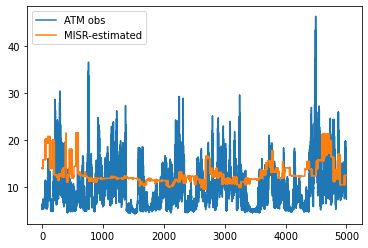

In [10]:
# plot transect
# transect_small["rms"].plot(x=transect_small.index)#, y=transect_small)
# plt.plot(transect_from_misr)

x = transect_small.index
plt.plot(x, transect_small["rms"])
plt.plot(x, transect_from_misr_list)
plt.legend(["ATM obs","MISR-estimated"])

In [11]:
transect_small.index

RangeIndex(start=0, stop=5000, step=1)

## statistics

In [12]:
transect_small.describe()

Unnamed: 0    path    orbit   block         line       sample  \
count  5000.000000  5000.0   5000.0  5000.0  5000.000000  5000.000000   
mean   2500.500000   152.0  86922.0     9.0    46.244290  1277.485134   
std    1443.520003     0.0      0.0     0.0    16.028244    40.315103   
min       1.000000   152.0  86922.0     9.0    18.510000  1205.450000   
25%    1250.750000   152.0  86922.0     9.0    32.325000  1243.205000   
50%    2500.500000   152.0  86922.0     9.0    46.150000  1277.775000   
75%    3750.250000   152.0  86922.0     9.0    59.880000  1312.247500   
max    5000.000000   152.0  86922.0     9.0    75.150000  1346.890000   

               lat          lon         Ca_r         Cf_r         An_r  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     74.264811   215.148158     0.784005     1.354142     0.525460   
std       0.088278     0.222132     0.064106     0.064803     0.069778   
min      74.112538   214.766966     0.414040     0.964100     0.173390   
25%      74.188499   214.956954     0.759580     1.347090     0.488540   
50%      74.264352   215.145185     0.787480     1.366690     0.520500   
75%      74.339903   215.336733     0.827930     1.384060     0.585210   
max      74.422639   215.548307     0.851500     1.424680     0.607780   

               rms  
count  5000.000000  
mean      9.735558  
std       4.606347  
min       4.200000  
25%       5.940000  
50%       8.775000  
75%      12.162500  
max      46.430000

## histogram

<AxesSubplot:>

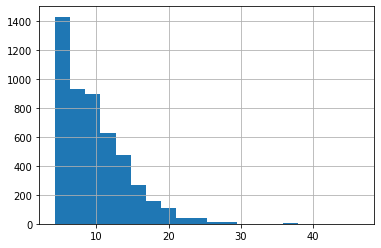

In [13]:
transect_small["rms"].hist(bins=20, alpha=1)